In [2]:
import numpy as np
import pandas as pd
import os
import pprint
import json
import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
%matplotlib inline

In [3]:
dataset_name = 'unequal_variance_blobs'

In [4]:
input_dir = './raw'
output_dir = './processed'

inp_fname = f'unequal_variance_blobs.csv'

outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_test_key_fname = os.path.join(output_dir, f'{dataset_name}_test_key.csv')
outp_infer_instances = os.path.join(output_dir, f'{dataset_name}_infer_req.json')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

# Create Data

In [5]:
def set_seeds():
    np.random.seed(0)
    random.seed(0)

In [6]:
def get_cov_matrix():
    A = np.random.rand(NUM_FEATURES, NUM_FEATURES)
    B = np.dot(A, A.transpose())
    
    rand_scale = np.random.uniform(.1,10)
    B = B * rand_scale
    return B
          
#get_cov_matrix()

In [7]:
def get_cluster_params():
    num_samples = np.random.randint(NUM_SAMPLES_FROM_CLUSTER_MIN, NUM_SAMPLES_FROM_CLUSTER_MAX)
    mean = np.random.uniform(MEAN_MIN,MEAN_MAX,NUM_FEATURES)
    cov = get_cov_matrix()
    return {
        "num_samples": num_samples,
        "mean": mean,
        "cov": cov
    }

In [8]:
def get_cluster_samples(cluster_params):
    samples = np.random.multivariate_normal(
        mean=cluster_params["mean"], 
        cov=cluster_params["cov"],  
        size=cluster_params["num_samples"]
    )
    return samples

In [9]:
MEAN_MIN = -3.
MEAN_MAX = 3.
COV_MIN = -5.
COV_MAX = 5.

NUM_FEATURES = 8

NUM_CLUSTERS = 8

NUM_SAMPLES_FROM_CLUSTER_MIN = 300
NUM_SAMPLES_FROM_CLUSTER_MAX = 1500

set_seeds()

all_Xs, all_ys = [], []
for i in range(NUM_CLUSTERS):
    cluster_params = get_cluster_params()
    samples = get_cluster_samples(cluster_params)
    all_Xs.append(samples)
    all_ys.append(np.ones(shape=samples.shape[0])*i)
    
X = np.concatenate(all_Xs, axis=0)
y = np.concatenate(all_ys, axis=0)
print(np.unique(y, return_counts=True), y.shape)

(array([0., 1., 2., 3., 4., 5., 6., 7.]), array([ 984, 1404,  970, 1196,  302,  695, 1412, 1104], dtype=int64)) (8067,)


In [10]:
if NUM_FEATURES == 2:
    fig = plt.scatter(Xs[:,0], Xs[:, 1], alpha=0.2, c=ys)

# Plot the Generated Data

In [11]:
tsne = TSNE(n_components=2)

fitted_data = tsne.fit_transform(X)
fitted_data.shape

C:\Users\abbus\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\abbus\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(8067, 2)

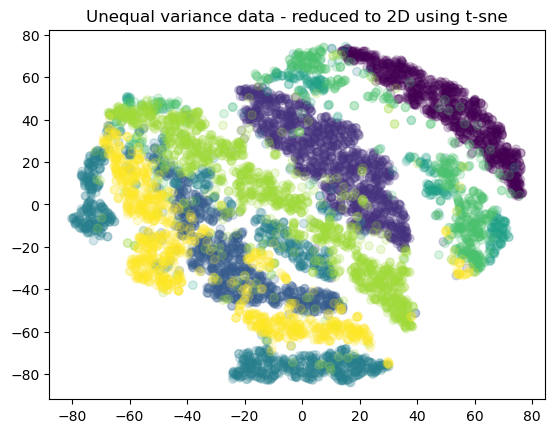

In [12]:
fig = plt.scatter(fitted_data[:,0], fitted_data[:, 1], alpha=0.2, c=y)
plt.title("Unequal variance data - reduced to 2D using t-sne")
plt.savefig(outp_fig_fname)

# Prepare Data

In [13]:
id_col = "id"
target_col = "y"

In [14]:
cols = [f"x{i+1}" for i in range(NUM_FEATURES)]
cols

data = pd.DataFrame(X, columns=cols)
data["y"] = y
data.insert(0, id_col, np.arange(X.shape[0]))

data[id_col] = data[id_col].astype(str)
data.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,y
0,0,1.549367,2.711957,2.253189,1.869028,0.821987,0.055419,-0.685244,-1.958862,0.0
1,1,-0.491735,0.289829,1.244965,1.746405,-1.019959,-2.508979,-2.304052,-4.475070,0.0
2,2,-1.431725,0.705486,-0.139013,1.475356,-1.358219,-1.756315,-2.980724,-3.161342,0.0
3,3,-1.136216,-0.420235,0.448600,1.345502,-1.937306,-2.990424,-2.924327,-4.785418,0.0
4,4,0.391644,2.521337,3.793273,1.714069,2.154602,-0.132773,-0.294504,-2.442371,0.0


In [15]:
df.to_csv(os.path.join(input_dir, f"{dataset_name}.csv"), index=False)

NameError: name 'df' is not defined

In [ ]:
data.info()

# Shuffle Data

In [ ]:
# shuffle data
data = data.sample(frac=1, random_state=42)
data.head()

# Save Main Data File

In [ ]:
data.drop(target_col,axis=1).to_csv(outp_fname, index=False)

# Test Key

In [ ]:
data_key = data[[id_col, target_col]].rename(columns={target_col: "__target__"})
data_key.to_csv(outp_test_key_fname, index=False)

# JSON inference request instance

In [ ]:
instance = data.drop(columns=[target_col]).reset_index(drop=True).loc[0].to_dict()
infer_req_instance_dict = {  "instances": [ {**instance}, ] }
pprint.pprint(infer_req_instance_dict)
   
with open(outp_infer_instances, 'w', encoding='utf8') as f:
    json.dump(infer_req_instance_dict, f, indent=2, ensure_ascii=False)